In [1]:
#Converting my dataset from .parquet to .csv
import pandas as pd

df = pd.read_parquet('train-00000-of-00001.parquet')
df.to_csv('train-00000-of-00001.csv')

In [2]:
# Opening the file
file_path = 'train-00000-of-00001.csv'
data = pd.read_csv(file_path)
print(data.head())

   Unnamed: 0                            en                  lt
0           0            Meeting in Vilnius  Sutikimas Vilniuje
1           1           That is the address        Štai adresas
2           2       Where does Sigita live?  Kur gyvena Sigita?
3           3  I am looking for Miss Sigita   Aš ieškau Sigitos
4           4                 Just a moment            Minutėlę


In [3]:
# Printing the number of columns
num_columns = data.shape[1]
print(f"The number of columns is: {num_columns}")

The number of columns is: 3


In [4]:
# Getting Lithuanian sentences
sentences = data.iloc[:, -1]
print(sentences.head())

0    Sutikimas Vilniuje
1          Štai adresas
2    Kur gyvena Sigita?
3     Aš ieškau Sigitos
4              Minutėlę
Name: lt, dtype: object


In [8]:
import re

# Splitting rows into sentences and counting words
def split_and_count(sentences):
    all_sentences = []
    for row in sentences:
        split_sentences = re.split(r'[.?!]', row)
        split_sentences = [sentence.strip() for sentence in split_sentences if sentence.strip()]
        all_sentences.extend(split_sentences)
    return all_sentences

# Getting a list of all Lithuanian sentences
all_sentences = split_and_count(sentences)

# Counting words in each sentence
sentence_lengths = [len(sentence.split()) for sentence in all_sentences]

# Computing the average sentence length
average_length = sum(sentence_lengths) / len(sentence_lengths) if sentence_lengths else 0

print(f"Average sentence length is {average_length:.2f} words.")

Average sentence length is 3.74 words.


In [9]:
import stanza
stanza.download("lt")

2024-11-19 16:48:58 INFO: Downloaded file to /Users/urtejakubauskaite/stanza_resources/resources.json
2024-11-19 16:48:58 INFO: Downloading default packages for language: lt (Lithuanian) ...


2024-11-19 16:49:12 INFO: Downloaded file to /Users/urtejakubauskaite/stanza_resources/lt/default.zip
2024-11-19 16:49:25 INFO: Finished downloading models and saved to /Users/urtejakubauskaite/stanza_resources


In [20]:
# Loading the Lithuanian pipeline
nlp = stanza.Pipeline("lt")

# POS tagging
pos_tags = []
for sentence in all_sentences:
    doc = nlp(sentence)
    for sentence in doc.sentences:
        for word in sentence.words:
            print(f"Word: {word.text}, POS: {word.upos}")
            pos_tags.append(word.upos)

2024-11-19 17:06:21 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-11-19 17:06:22 INFO: Downloaded file to /Users/urtejakubauskaite/stanza_resources/resources.json
2024-11-19 17:06:24 INFO: Loading these models for language: lt (Lithuanian):
| Processor | Package          |
--------------------------------
| tokenize  | alksnis          |
| pos       | alksnis_nocharlm |
| lemma     | alksnis_nocharlm |
| depparse  | alksnis_nocharlm |

2024-11-19 17:06:24 INFO: Using device: cpu
2024-11-19 17:06:24 INFO: Loading: tokenize
2024-11-19 17:06:24 INFO: Loading: pos
2024-11-19 17:06:25 INFO: Loading: lemma
2024-11-19 17:06:25 INFO: Loading: depparse
2024-11-19 17:06:26 INFO: Done loading processors!


Word: Sutikimas, POS: NOUN
Word: Vilniuje, POS: PROPN
Word: Štai, POS: PART
Word: adresas, POS: NOUN
Word: Kur, POS: ADV
Word: gyvena, POS: VERB
Word: Sigita, POS: PROPN
Word: Aš, POS: PRON
Word: ieškau, POS: VERB
Word: Sigitos, POS: NOUN
Word: Minutėlę, POS: NOUN
Word: Atsiprašau, POS: VERB
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kas, POS: PRON
Word: Jūs, POS: PRON
Word: Alio, POS: NOUN
Word: ,, POS: PUNCT
Word: aš, POS: PRON
Word: esu, POS: AUX
Word: Jonas, POS: PROPN
Word: Vasiliauskas, POS: PROPN
Word: Aš, POS: PRON
Word: esu, POS: AUX
Word: iš, POS: ADP
Word: Lietuvos, POS: PROPN
Word: Sveiki, POS: ADJ
Word: atvykę, POS: VERB
Word: į, POS: ADP
Word: Vilnių, POS: PROPN
Word: Jums, POS: PRON
Word: užsakytas, POS: VERB
Word: kambarys, POS: NOUN
Word: viešbutyje, POS: NOUN
Word: Viešbutis, POS: NOUN
Word: vadinasi, POS: VERB
Word: ", POS: PUNCT
Word: Žaliasis, POS: ADJ
Word: tiltas, POS: NOUN
Word: ", POS: PUNCT
Word: Viešbutis, POS: NOUN
Word: nedidelis, POS: ADJ
Word: Jis, POS

Word: Prie, POS: ADP
Word: pirmo, POS: NUM
Word: prekystalio, POS: NOUN
Word: Kada, POS: ADV
Word: Tiksliai, POS: ADV
Word: dešimtą, POS: NOUN
Word: Ar, POS: PART
Word: tinka, POS: VERB
Word: Kiek, POS: ADV
Word: dabar, POS: ADV
Word: Greitai, POS: ADV
Word: dešimt, POS: NUM
Word: Iki, POS: ADP
Word: Greitai, POS: ADV
Word: pasimatysime, POS: VERB
Word: Turguje, POS: NOUN
Word: Ach, POS: X
Word: ,, POS: PUNCT
Word: kaip, POS: SCONJ
Word: puikiai, POS: ADV
Word: kvepia, POS: VERB
Word: braškės, POS: NOUN
Word: O, POS: CCONJ
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: mano, POS: PRON
Word: mėgstamiausios, POS: ADJ
Word: uogos, POS: NOUN
Word: Bet, POS: CCONJ
Word: Ana, POS: NOUN
Word: ,, POS: PUNCT
Word: braškės, POS: NOUN
Word: ne, POS: PART
Word: šviežios, POS: ADJ
Word: Ne, POS: PART
Word: šviežios, POS: ADJ
Word: Kaip, POS: ADV
Word: gaila, POS: ADV
Word: Prie, POS: ADP
Word: daržovių, POS: NOUN
Word: prekystalio, POS: ADJ
Word: Man, POS: PRON
Word: prašau, POS: VERB
Word: ilg

Word: Kuo, POS: PRON
Word: galiu, POS: VERB
Word: Jums, POS: PRON
Word: padėti, POS: VERB
Word: Ar, POS: PART
Word: turite, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: turime, POS: VERB
Word: Kada, POS: ADV
Word: norėsite, POS: VERB
Word: Rytoj, POS: PRON
Word: vakare, POS: NOUN
Word: iki, POS: ADP
Word: ketvirtadienio, POS: NOUN
Word: ,, POS: PUNCT
Word: vienai, POS: DET
Word: nakčiai, POS: NOUN
Word: Taip, POS: PART
Word: dar, POS: X
Word: turime, POS: VERB
Word: laisvų, POS: ADJ
Word: kambarių, POS: NOUN
Word: Kokio, POS: DET
Word: Jūs, POS: PRON
Word: norėtumėte, POS: VERB
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Dvi, POS: NUM
Word: vienutes, POS: NOUN
Word: su, POS: ADP
Word: voniomis, POS: NOUN
Word: Jūsų, POS: PRON
Word: pavardė, POS: NOUN
Word: Vilsonas, POS: PROPN
Word: ir, POS: CCONJ
Word: Holzas, POS: PROPN
Word: Tai, POS: DET
Word: ponia, POS: VERB
Word: Hol

Word: Bet, POS: CCONJ
Word: ką, POS: PRON
Word: aš, POS: PRON
Word: galiu, POS: VERB
Word: padaryti, POS: VERB
Word: Susitikimas, POS: NOUN
Word: lėktuve, POS: NOUN
Word: Sveika, POS: ADJ
Word: ,, POS: PUNCT
Word: ponia, POS: NOUN
Word: Šmidt, POS: PUNCT
Word: Koks, POS: DET
Word: netikėtumas, POS: NOUN
Word: Jus, POS: PRON
Word: čia, POS: ADV
Word: lėktuve, POS: NOUN
Word: sutikti, POS: VERB
Word: Tikrai, POS: ADV
Word: Kaip, POS: ADV
Word: sekasi, POS: VERB
Word: Puikiai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: Jums, POS: PRON
Word: Kur, POS: ADV
Word: Jūs, POS: PRON
Word: vykstate, POS: VERB
Word: Ruošiuosi, POS: VERB
Word: aplankyti, POS: VERB
Word: savo, POS: PRON
Word: sūnų, POS: NOUN
Word: Jis, POS: PRON
Word: gyvena, POS: VERB
Word: Šveicarijoje, POS: PROPN
Word: O, POS: CCONJ
Word: Jūs, POS: PRON
Word: Aš, POS: PRON
Word: vėl, POS: ADV
Word: komandiruotėje, POS: NOUN
Word: Aš, POS: PRON
Word: dažnai, POS: ADV
Word: skrendu, POS: VERB
Word: šiuo, POS: DET
Word: m

Word: Aš, POS: PRON
Word: neturiu, POS: VERB
Word: laiko, POS: NOUN
Word: Turi, POS: VERB
Word: galvoje, POS: NOUN
Word: ,, POS: PUNCT
Word: nuo, POS: ADP
Word: stoties, POS: NOUN
Word: Na, POS: INTJ
Word: gerai, POS: ADV
Word: ,, POS: PUNCT
Word: o, POS: CCONJ
Word: kaip, POS: SCONJ
Word: jis, POS: PRON
Word: atrodo, POS: VERB
Word: Jis, POS: PRON
Word: labai, POS: ADV
Word: aukštas, POS: ADJ
Word: ,, POS: PUNCT
Word: apie, POS: ADP
Word: 1,8, POS: NUM
Word: m, POS: NOUN
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: pilnas, POS: ADJ
Word: Ar, POS: PART
Word: jis, POS: PRON
Word: nešioja, POS: VERB
Word: akinius, POS: NOUN
Word: Taip, POS: ADV
Word: ,, POS: PUNCT
Word: jis, POS: PRON
Word: visada, POS: ADV
Word: apsirengęs, POS: VERB
Word: elegantiškai, POS: ADV
Word: Dažniausiai, POS: ADV
Word: tamsiu, POS: ADJ
Word: kostiumu, POS: NOUN
Word: ,, POS: PUNCT
Word: visada, POS: ADV
Word: su, POS: ADP
Word: portfeliu, POS: NOUN
Word: Tokių, POS: DET
Word: šimtai, POS: NUM
Word: Koks, POS

Word: Visi, POS: DET
Word: daiktai, POS: NOUN
Word: originalūs, POS: ADJ
Word: ,, POS: PUNCT
Word: iš, POS: ADP
Word: 18, POS: NUM
Word: amžiaus, POS: NOUN
Word: Aš, POS: PRON
Word: girdėjau, POS: VERB
Word: apie, POS: ADP
Word: tai, POS: DET
Word: Tikiuosi, POS: VERB
Word: ,, POS: PUNCT
Word: mes, POS: PRON
Word: jų, POS: PRON
Word: nesudaužysime, POS: VERB
Word: Nesijaudink, POS: VERB
Word: Jie, POS: PRON
Word: visi, POS: DET
Word: po, POS: ADP
Word: stiklu, POS: NOUN
Word: Vėlavimas, POS: NOUN
Word: į, POS: ADP
Word: susitikimą, POS: NOUN
Word: Jau, POS: ADV
Word: 20, POS: NUM
Word: minučių, POS: NOUN
Word: po, POS: ADP
Word: dvyliktos, POS: NOUN
Word: Aš, POS: PRON
Word: Jūsų, POS: PRON
Word: laukiau, POS: VERB
Word: dvyliktą, POS: PROPN
Word: Bet, POS: CCONJ
Word: Jūs, POS: PRON
Word: gi, POS: PART
Word: uždusęs, POS: VERB
Word: Atsiprašau, POS: VERB
Word: ,, POS: PUNCT
Word: bet, POS: CCONJ
Word: man, POS: PRON
Word: labai, POS: ADV
Word: nesisekė, POS: VERB
Word: Nesėkminga, POS

Word: Gal, POS: PART
Word: eisime, POS: VERB
Word: į, POS: ADP
Word: kiną, POS: NOUN
Word: ar, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: dar, POS: PART
Word: gauti, POS: VERB
Word: bilietus, POS: NOUN
Word: Galėtumėm, POS: VERB
Word: ir, POS: CCONJ
Word: pašokti, POS: VERB
Word: nueiti, POS: VERB
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: viską, POS: PRON
Word: ,, POS: PUNCT
Word: ir, POS: CCONJ
Word: baletą, POS: NOUN
Word: ir, POS: CCONJ
Word: teatrą, POS: NOUN
Word: Aš, POS: PRON
Word: mėgstu, POS: VERB
Word: ir, POS: CCONJ
Word: kiną, POS: NOUN
Word: ;, POS: PUNCT
Word: sugalvok, POS: VERB
Word: ,, POS: PUNCT
Word: ką, POS: PRON
Word: mes, POS: PRON
Word: darysime, POS: VERB
Word: Aš, POS: PRON
Word: tiesiog, POS: ADV
Word: norėčiau, POS: VERB
Word: kur, POS: ADV
Word: nors, POS: X
Word: išeiti, POS: VERB
Word: Piteris, POS: PROPN
Word: prisimena, POS: VERB
Word: ,, POS: PUNCT
Word: kaip, POS: SCONJ
Word: sunku, POS: ADJ
Word: prie, POS: ADP
Word: k

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_8920/3975733315.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")


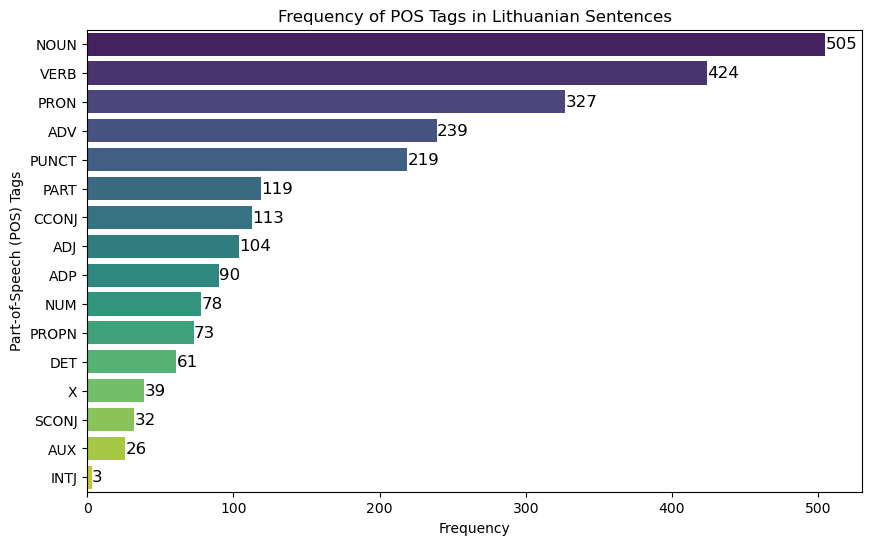

In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the frequency of each POS tag
pos_counts = Counter(pos_tags)

# Creating a DataFrame with POS tags and their frequencies
df = pd.DataFrame(pos_counts.items(), columns = ["POS", "Frequency"])

# Sorting the DataFrame by frequency
df = df.sort_values(by = "Frequency", ascending = False)

# Plotting the bar chart
plt.figure(figsize = (10, 6))  # Set the figure size
ax = sns.barplot(x = "Frequency", y = "POS", data=df, palette = "viridis")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Part-of-Speech (POS) Tags")
plt.title("Frequency of POS Tags in Lithuanian Sentences")

# Adding values on the columns
for i, v in enumerate(df["Frequency"]):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)
    
# Saving the graph
plt.savefig('pos_tag_frequency_plot.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()

Vocabulary size: 992
Number of words that appear only once: 672
Words that appear more than once and their frequencies: {'vilniuje': 2, 'štai': 11, 'adresas': 3, 'kur': 15, 'gyvena': 3, 'sigita': 2, 'aš': 70, 'atsiprašau': 4, 'o': 39, 'kas': 14, 'jūs': 37, 'alio': 2, 'esu': 3, 'iš': 9, 'sveiki': 2, 'į': 17, 'jums': 8, 'kambarys': 6, 'viešbutyje': 2, 'viešbutis': 5, 'nedidelis': 2, 'jis': 18, 'mažas': 2, 'bet': 19, 'yra': 7, 'už': 8, 'dešinėje': 3, 'iki': 5, 'jus': 6, 'jūsų': 15, 'laukiau': 2, 'ar': 49, 'turite': 11, 'kambario': 4, 'numeris': 2, 'septintas': 2, 'aukšte': 4, 'puikus': 3, 'viena': 3, 'norite': 5, 'antrą': 2, 'ne': 25, 'ačiū': 20, 'taip': 36, 'būtų': 5, 'gerai': 14, 'ir': 47, 'rankšluostis': 2, 'didelis': 3, 'nuostabu': 2, 'negerai': 3, 'negaliu': 4, 'gatvėje': 3, 'mano': 10, 'labas': 5, 'rytas': 5, 'miegojote': 2, 'oras': 5, 'puiki': 3, 'diena': 8, 'jau': 8, 'gana': 2, 'šilta': 3, 'kiek': 2, 'dabar': 8, 'laiko': 3, 'tuoj': 4, 'dešimt': 7, 'kaip': 23, 'ką': 23, 'turime': 4

/var/folders/8n/bffnmy712gb5xcnz6597rjb80000gn/T/ipykernel_8920/781453405.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette="viridis")


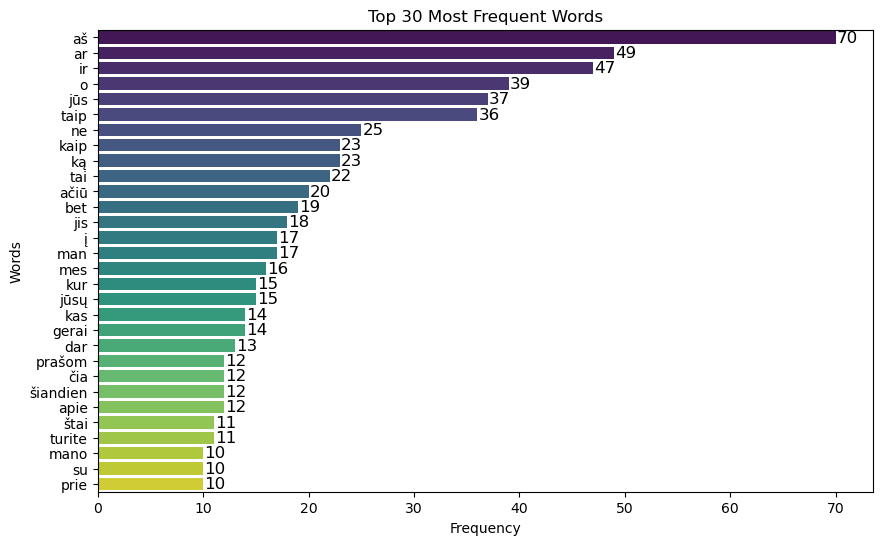

In [35]:
# Vocabulary size & the most frequent words
# Tokenizing the words (+ lowercasing them)
words = []
for sentence in all_sentences:
    words.extend(re.findall(r'\b\w+\b', sentence.lower()))

# Counting the frequency of each word
word_counts = Counter(words)

# Getting the most frequent 30 words
most_common_words = word_counts.most_common(30)

# Separating the words and their frequencies
words, frequencies = zip(*most_common_words)

print(f"Vocabulary size: {vocabulary_size}")
print(f"Number of words that appear only once: {len(words_once)}")
print(f"Words that appear more than once and their frequencies: {words_more_than_once}")

# Plotting the bar chart with the "viridis" color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencies, y=words, palette="viridis")

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')

# Adding values on the columns
for i, v in enumerate(frequencies):
    plt.text(v + 0.1, i, str(v), color='black', va='center', fontsize=12)

# Saving the graph
plt.savefig('top_30_most_frequent_words_plot.png', dpi=300, bbox_inches='tight')

# Showing the plot
plt.show()